# Inaugural Project

Imports and set magics:

In [83]:
# Setup (Cell 1)

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Autoreload modules when code is run. Otherwise, Python will not see recent changes.
%load_ext autoreload
%autoreload 2

# Import your own code
from exchangeeconomy2 import ExchangeEconomyClass

model = ExchangeEconomyClass()
par = model.par  # Gives access to parameters from ExchangeEconomyClass


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To illustrate the Pareto improvements (relative to the endowment) of the exchange economy under consideration, we initially create a class describing the utility and demand functions of the exchange economy (for further explanation see the file exchangeeconomy.py). Using the functions from ExchangeEconomyClass and a simple for loop we can plot the set C in the Edgeworth box.

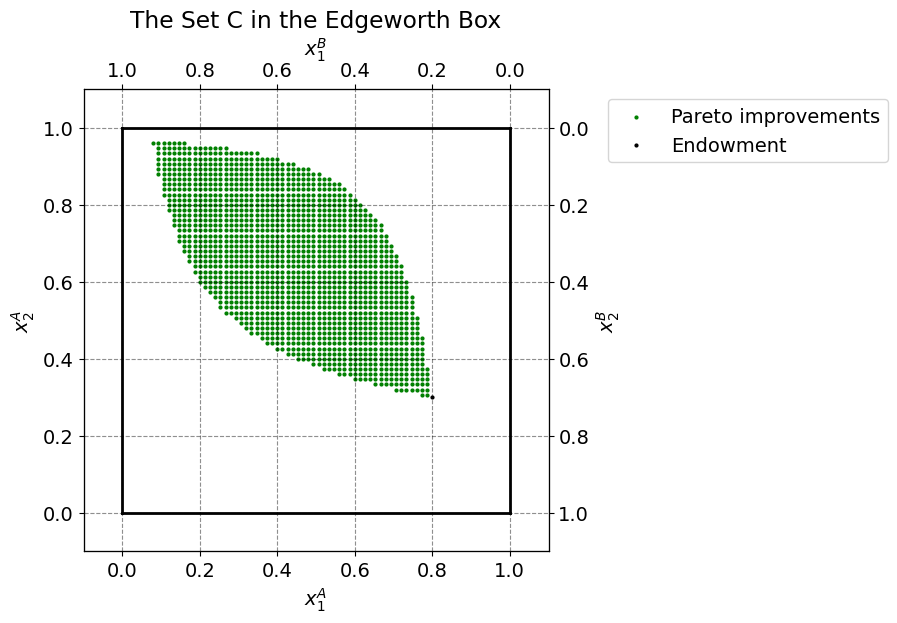

In [84]:
# Question 1 (Cell 2)

# Define N and create the arrays for x1A and x2A
N = 75
x1A_array = np.linspace(0, 1, N + 1)
x2A_array = np.linspace(0, 1, N + 1)

# Lists to store values satisfying the set C conditions
x1A_list = []
x2A_list = []

# Evaluate all combinations and store valid pairs in the lists
for x1A in x1A_array:
    for x2A in x2A_array:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and \
           model.utility_B(x1B, x2B) >= model.utility_B(par.w1B, par.w2B):
            x1A_list.append(x1A)
            x2A_list.append(x2A)

# Plot the valid combinations
model.plot_set_C(x1A_list, x2A_list)



# Question 2 and 3

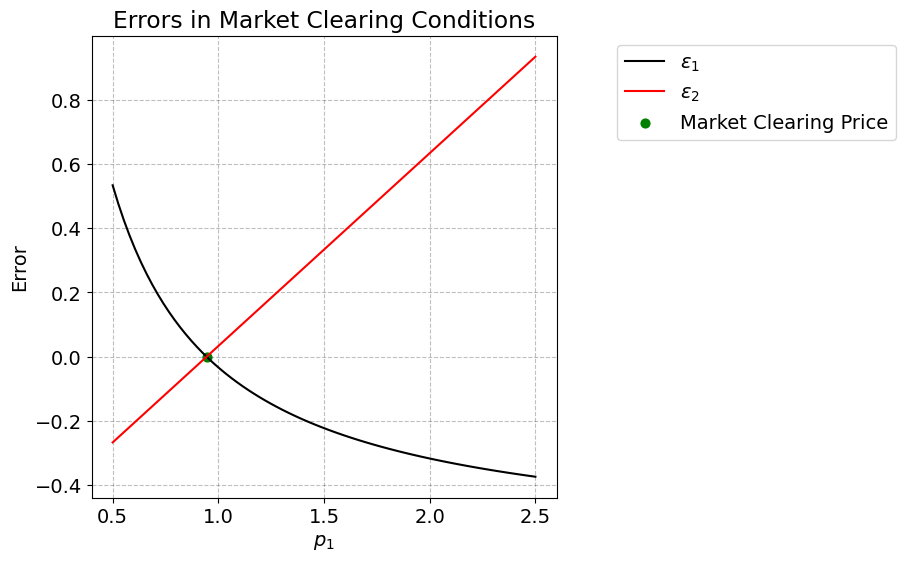

The market clearing price p₁ is 0.944
Error in market clearing conditions at p₁=0.944: ϵ₁=0.0002824858757061177, ϵ₂=-0.0002666666666666373


In [85]:

# Question 2 and 3 (Cell 3)

# Define the error calculation function
def check_market_clearing(p1_array):
    errors = []
    for p1 in p1_array:
        eps1, eps2 = model.check_market_clearing(p1)
        errors.append((eps1, eps2))
    return np.array(errors).T

# Calculate the errors
p1_array = np.linspace(0.5, 2.5, N + 1)
errors = check_market_clearing(p1_array)

# Find the market clearing price by minimizing the absolute value of the error
p1_cont = np.linspace(0.5, 2.5, 10000)
errors_cont = check_market_clearing(p1_cont)
intersection = p1_cont[np.argmin(abs(errors_cont[0]))]

# Plot the errors and the market clearing price
model.plot_market_clearing_errors(p1_array, errors, intersection)

# Print the market clearing price and the errors at that price
p1_star = round(intersection, 3)
eps1_star, eps2_star = model.check_market_clearing(p1_star)
print(f'The market clearing price p₁ is {p1_star}')
print(f'Error in market clearing conditions at p₁={p1_star}: ϵ₁={eps1_star}, ϵ₂={eps2_star}')


# Question 4a

Optimal allocation for A:
x1A = 0.619, x2A = 0.641
uA = 0.634
p1 = 1.887
Optimal allocation for B:
x1B = 0.381, x2B = 0.359


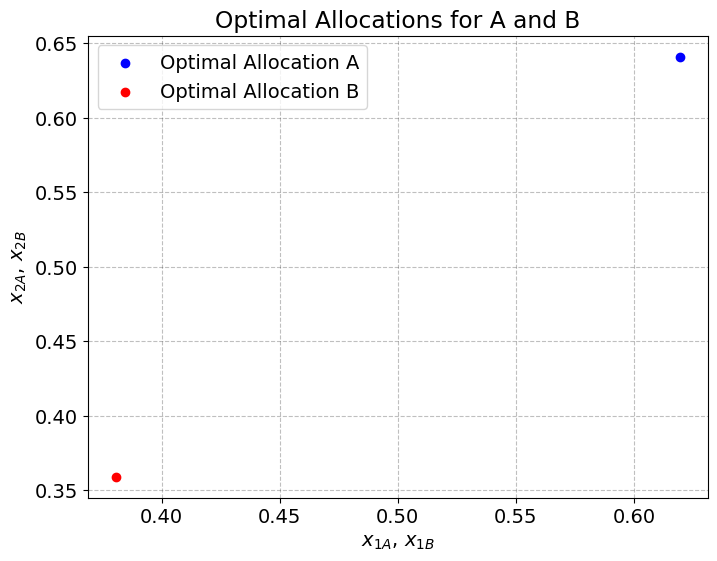

In [86]:
# Question 4a (Cell 4)

# Define the modified demand function of consumer A
def demand_A_mod(p1):
    x1B_star = par.beta * (p1 * par.w1B + par.p2 * par.w2B) / p1
    x2B_star = (1 - par.beta) * (p1 * par.w1B + par.p2 * par.w2B) / par.p2
    return 1 - x1B_star, 1 - x2B_star

# Calculate uA using p1's from the set P1
uA = model.utility_A(demand_A_mod(p1_array)[0], demand_A_mod(p1_array)[1])

# Replace 'Nan' values with zeroes
uA[np.isnan(uA)] = 0

# Find the index of the maximum uA
uA_max = np.argmax(uA)

# Obtain the optimal allocation for A
optimal_allocation_A = demand_A_mod(p1_array[uA_max])
p1_opt = p1_array[uA_max]

# Calculate B's optimal allocation
omega_1B = 1 - par.w1A
omega_2B = 1 - par.w2A
optimal_allocation_B = model.demand_B2(p1_opt, omega_1B, omega_2B)

# Print the optimal allocations
print('Optimal allocation for A:')
print(f'x1A = {round(optimal_allocation_A[0], 3)}, x2A = {round(optimal_allocation_A[1], 3)}')
print(f'uA = {round(uA[uA_max], 3)}')
print(f'p1 = {round(p1_opt, 3)}')

print('Optimal allocation for B:')
print(f'x1B = {round(optimal_allocation_B[0], 3)}, x2B = {round(optimal_allocation_B[1], 3)}')

# Plotting the results
model.plot_optimal_allocations_A_B(optimal_allocation_A, optimal_allocation_B)


# Question 4b

Optimal allocation for A:
x1A = 0.621, x2A = 0.64
uA = 0.634
p1 = 1.899
Optimal allocation for B:
x1B = 0.379, x2B = 0.36


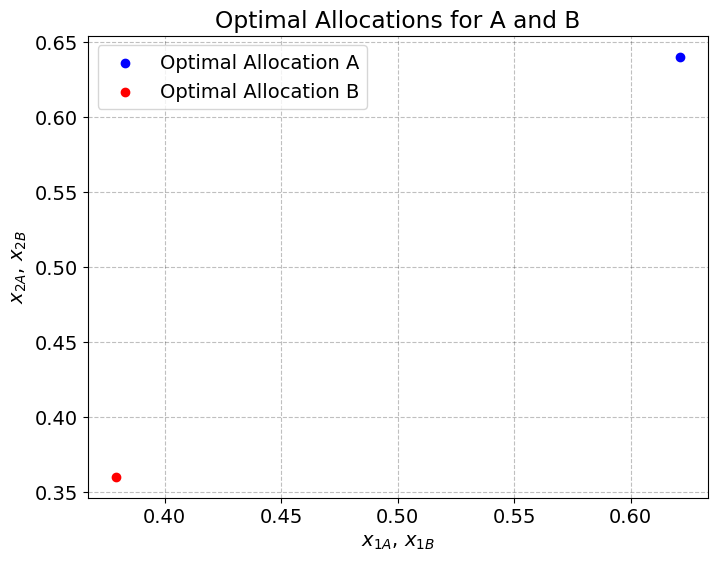

In [87]:
# Question 4b (Cell 5)

# Utility function to maximize
def utility_A_mod(p1):
    utility = model.utility_A(demand_A_mod(p1)[0], demand_A_mod(p1)[1])
    return -utility  # Negative sign because we are minimizing, but we want to maximize

# Initial guess for p1
initial_guess = 1.0

# Minimize the negative utility (equivalent to maximizing the utility)
result = minimize(utility_A_mod, initial_guess, method='Nelder-Mead')

# Extract the optimal price from the result
p1_opt = result.x[0]

# Calculate the corresponding utility
uA_opt = -result.fun

# Using the demand function for A
optimal_allocation_A = demand_A_mod(p1_opt)

print('Optimal allocation for A:')
print(f'x1A = {round(optimal_allocation_A[0], 3)}, x2A = {round(optimal_allocation_A[1], 3)}')
print(f'uA = {round(uA_opt, 3)}')
print(f'p1 = {round(p1_opt, 3)}')

# Calculate B's optimal allocation
omega_1B = 1 - par.w1A
omega_2B = 1 - par.w2A
optimal_allocation_B = model.demand_B2(p1_opt, omega_1B, omega_2B)

print('Optimal allocation for B:')
print(f'x1B = {round(optimal_allocation_B[0], 3)}, x2B = {round(optimal_allocation_B[1], 3)}')

# Plotting the results
model.plot_optimal_allocations_A_B(optimal_allocation_A, optimal_allocation_B)


# Question 5a

Optimal allocation for A: x1A = 0.56, x2A = 0.853
Maximum utility for A: 0.742


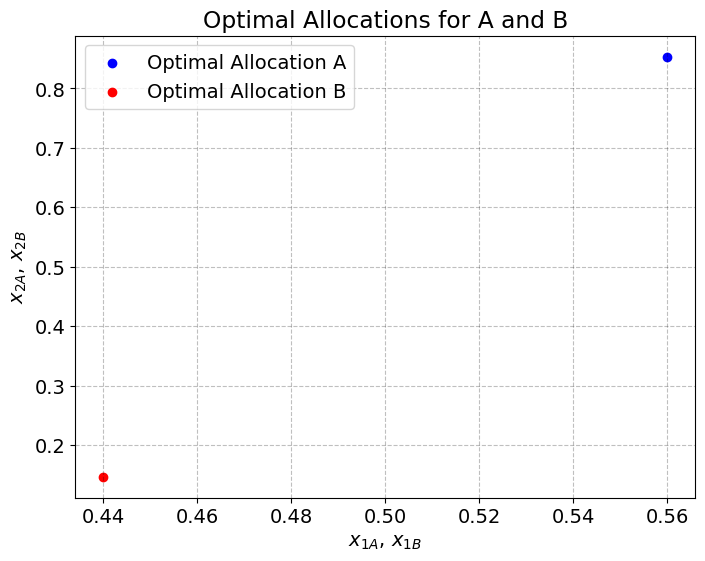

In [88]:
# Question 5a (Cell 6)

# Find the allocations within set C that maximize A's utility
max_utility_A = 0
optimal_allocation_A = (0, 0)

for x1A in x1A_array:
    for x2A in x2A_array:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and model.utility_B(x1B, x2B) >= model.utility_B(par.w1B, par.w2B):
            current_utility_A = model.utility_A(x1A, x2A)
            if current_utility_A > max_utility_A:
                max_utility_A = current_utility_A
                optimal_allocation_A = (x1A, x2A)

# Print the optimal allocation and the maximum utility for A
print(f"Optimal allocation for A: x1A = {round(optimal_allocation_A[0], 3)}, x2A = {round(optimal_allocation_A[1], 3)}")
print(f"Maximum utility for A: {round(max_utility_A, 3)}")

# Plot the results
model.plot_optimal_allocations_A_B(optimal_allocation_A, (1 - optimal_allocation_A[0], 1 - optimal_allocation_A[1]))


# Question 5b

Optimal allocation for A: x1A = 0.681, x2A = 0.725
Utility for A at this allocation: 0.71


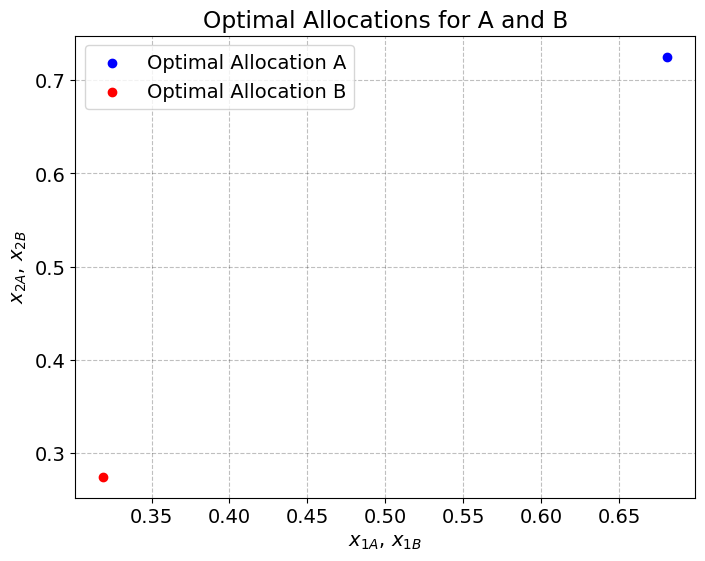

In [89]:
# Question 5b (Cell 7)

# Constraint for B's utility
def constraint(x):
    return model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(par.w1B, par.w2B)

# Optimization problem
def objective(x):
    return -model.utility_A(x[0], x[1])  # Negative because we want to maximize

x0 = [0.5, 0.5]  # Initial guess
bounds = [(0, 1), (0, 1)]  # x1A and x2A are between 0 and 1
cons = {'type': 'ineq', 'fun': constraint}

result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

x1A_opt, x2A_opt = result.x
utility_A_opt = -result.fun

print(f"Optimal allocation for A: x1A = {round(x1A_opt, 3)}, x2A = {round(x2A_opt, 3)}")
print(f"Utility for A at this allocation: {round(utility_A_opt, 3)}")

# Plot the results
model.plot_optimal_allocations_A_B((x1A_opt, x2A_opt), (1 - x1A_opt, 1 - x2A_opt))



# Question 6a

Resulting allocation for aggregate utility maximization: x1A = 0.333, x2A = 0.667
Aggregate utility at this allocation: 1.058


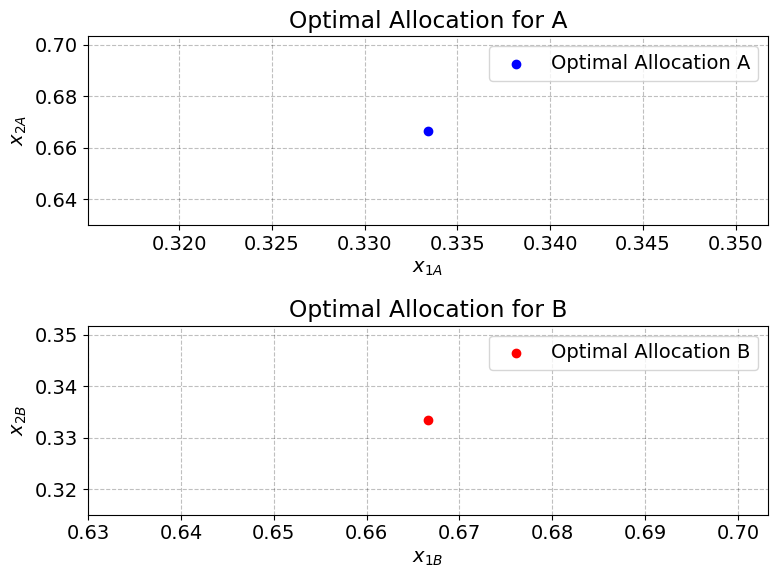

In [90]:
# Question 6a (Cell 8)

# Corrected aggregate utility function
def aggregate_utility(x):
    return - (model.utility_A(x[0], x[1]) + model.utility_B(1 - x[0], 1 - x[1]))

# Solve optimization with corrected function
result_agg = minimize(aggregate_utility, x0, method='SLSQP', bounds=bounds)

x1A_agg, x2A_agg = result_agg.x
aggregate_utility_opt = -result_agg.fun

print(f"Resulting allocation for aggregate utility maximization: x1A = {round(x1A_agg, 3)}, x2A = {round(x2A_agg, 3)}")
print(f"Aggregate utility at this allocation: {round(aggregate_utility_opt, 3)}")

# Plot the utilities separately for A and B
model.plot_utility_allocations(x1A_agg, x2A_agg)


# Question 6b

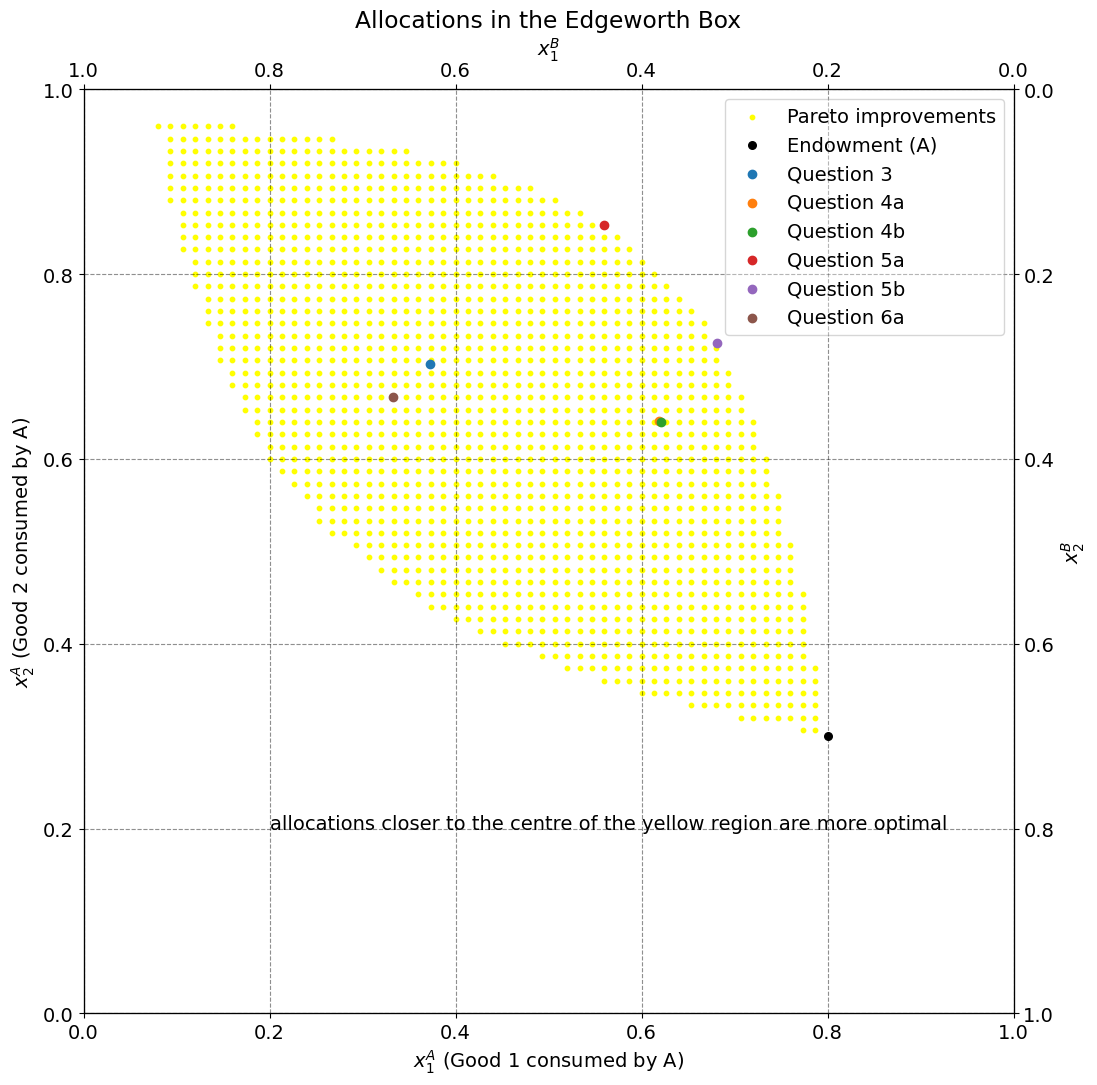

In [91]:
# Question 6b (Cell 9)

# Compare allocations
allocations = {
    'Question 3': (0.373, 0.703),
    'Question 4a': (0.619, 0.641),
    'Question 4b': (0.621, 0.64),
    'Question 5a': (0.56, 0.853),
    'Question 5b': (0.681, 0.725),
    'Question 6a': (0.333, 0.667)
}

# Plot the allocations
model.plot_edgeworth_box(allocations, x1A_list, x2A_list)



Pros and Cons of Various Allocations:

- **Question 3**: This allocation achieves market clearing and is easy to compute but may not maximize social welfare.
- **Question 4a**: Allows Consumer A to optimize utility within a restricted price set, which may not be globally optimal but is straightforward.
- **Question 4b**: Provides a more flexible optimization for Consumer A, likely resulting in better individual outcomes for A but may increase computational complexity.
- **Question 5a**: Constrains the optimization to Pareto improvements, ensuring fairness but potentially limiting efficiency.
- **Question 5b**: Removes constraints, offering a utilitarian perspective but may challenge equity considerations.
- **Question 6a**: Maximizes aggregate utility, balancing fairness and efficiency but depends heavily on accurate utility functions.


# Question 7

We draw 50 elements from the set W
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>W</mi>
  <mo>=</mo>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">{</mo>
    <mo stretchy="false">(</mo>
    <msubsup>
      <mi>&#x3C9;</mi>
      <mrow data-mjx-texclass="ORD">
        <mn>1</mn>
      </mrow>
      <mi>A</mi>
    </msubsup>
    <mo>,</mo>
    <msubsup>
      <mi>&#x3C9;</mi>
      <mrow data-mjx-texclass="ORD">
        <mn>2</mn>
      </mrow>
      <mi>A</mi>
    </msubsup>
    <mo stretchy="false">)</mo>
    <mo>&#x2223;</mo>
    <msubsup>
      <mi>&#x3C9;</mi>
      <mrow data-mjx-texclass="ORD">
        <mn>1</mn>
      </mrow>
      <mi>A</mi>
    </msubsup>
    <mo>&#x223C;</mo>
    <mi>U</mi>
    <mo stretchy="false">(</mo>
    <mn>0</mn>
    <mo>,</mo>
    <mn>1</mn>
    <mo stretchy="false">)</mo>
    <mo>,</mo>
    <msubsup>
      <mi>&#x3C9;</mi>
      <mrow data-mjx-texclass="ORD">
        <mn>2</mn>
      </mrow>
      <mi>A</mi>
    </msubsup>
    <mo>&#x223C;</mo>
    <mi>U</mi>
    <mo stretchy="false">(</mo>
    <mn>0</mn>
    <mo>,</mo>
    <mn>1</mn>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">}</mo>
  </mrow>
</math>

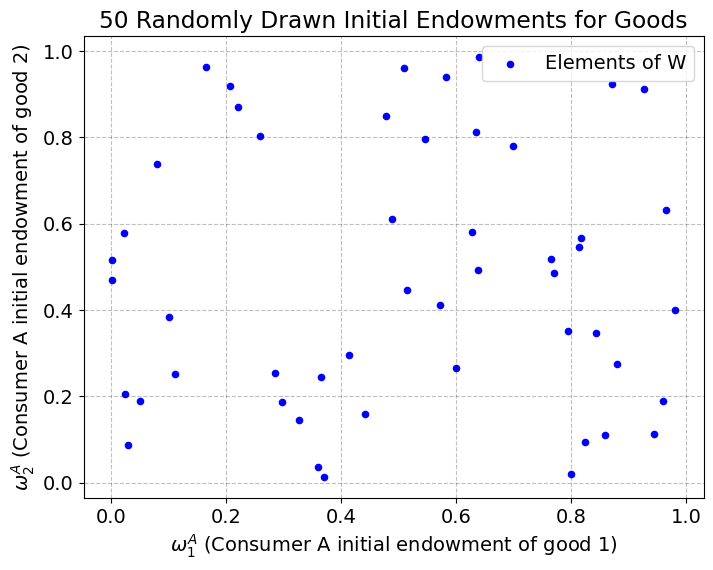

In [92]:
# Question 7 (Cell 10)

# Plotting the elements of W
model.plot_initial_endowments()


# Question 8

We look for prices that clear the market for each pair of starting supplies. We use minimize errors and find these prices. Then, using these prices, we figure out how much of each good everyone will choose to have. We show all this on a simple chart.

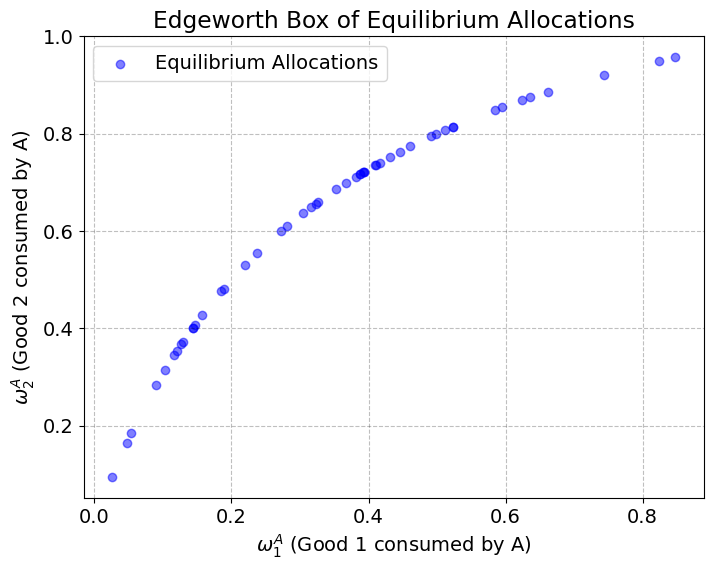

In [93]:
# Question 8 (Cell 11)

# Find and plot equilibria
model.find_and_plot_equilibria()
